<a href="https://colab.research.google.com/github/Beda3113/-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Python%2C_%D0%98%D0%98%2C_%D0%B1%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D0%B0%2C_%D0%94%D0%973%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача 1. 45 баллов
Вам предлагается проанализировать датасет с Data - вакансиями. Скачайте его https://disk.yandex.ru/d/QUa3pCKVk48cAQ и считайте с помощью pd.read_csv.

0. Выведите первые 5 и последние 5 строк датасета. Примените к датасету методы info и describe **(1)**


In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/Beda3113/practice/refs/heads/main/vacancies.csv')

print(df.head(5))
print(df.tail(5))

df.info()
df.describe()


   Unnamed: 0                                      position_name  \
0           0                               Data Scientist Авито   
1           1                                       Data analyst   
2           2                         Data Engineer/Data Analyst   
3           3                      Стажер в направление Big Data   
4           4  Data Marketing Manager / Маркетолог по анализу...   

                                     employer_name     area  \
0                                     Changellenge   Москва   
1  Публичная Компания «Freedom Finance Global PLC»   Алматы   
2                                         IMANTECH  Ташкент   
3                                               T2   Москва   
4                                 Procter & Gamble   Алматы   

           experience       schedule        employment  \
0  От 1 года до 3 лет    Полный день  Полная занятость   
1  От 1 года до 3 лет    Полный день  Полная занятость   
2           Нет опыта  Гибкий график  

,Unnamed: 0
count,1527.000000
mean,763.000000
std,440.951244
min,0.000000
25%,381.500000
50%,763.000000
75%,1144.500000
max,1526.000000


1. Сколько в датасете строк и столбцов? **(1)**

In [6]:
print(f'Количество строк: {df.shape[0]}, количество столбцов: {df.shape[1]}')

Количество строк: 1527, количество столбцов: 11


2. Есть ли в датасете пропуски? **(1)**

In [7]:
df.isnull().sum()


,0
Unnamed: 0,0
position_name,0
employer_name,0
area,0
experience,0
schedule,0
employment,0
professional_roles,0
salary,1307
description,0


3. Есть в датасете полные дубли? Если да, удалите их (метод drop_duplicates). **(1)**

In [8]:
duplicates = df.duplicated().any()

df_cleaned = df.drop_duplicates()
print(df_cleaned)

      Unnamed: 0                                      position_name  \
0              0                               Data Scientist Авито   
1              1                                       Data analyst   
2              2                         Data Engineer/Data Analyst   
3              3                      Стажер в направление Big Data   
4              4  Data Marketing Manager / Маркетолог по анализу...   
...          ...                                                ...   
1522        1522            Senior Data Scientist в b2c направление   
1523        1523                              Data analyst (Senior)   
1524        1524                                Senior Data Analyst   
1525        1525                             TeamLead Data Engineer   
1526        1526            Senior Python Developer (Data Platform)   

                                        employer_name     area  \
0                                        Changellenge   Москва   
1     Публичная

4. Сколько уникальных значений у переменной professional_roles? **(1)**

In [9]:
unique_roles = df['professional_roles'].nunique()
print(f'Количество уникальных профессиональных ролей: {unique_roles}')

Количество уникальных профессиональных ролей: 36


5. Сколько в датасете вакансий, не требующих опыта? (**2**)

In [10]:
print(df['experience'].unique())
no_experience_count = df[df['experience'] == 'Нет опыта'].shape[0]
print(f'Количество вакансий без опыта: {no_experience_count}')

['От 1 года до 3 лет' 'Нет опыта' 'От 3 до 6 лет' 'Более 6 лет']
Количество вакансий без опыта: 136


6. Какое среднее количество навыков в вакансии? (переменная key_skills) **(2)**

In [11]:
avg_skills = df['key_skills'].apply(lambda x: len(eval(x))).mean()
avg_skills_rounded = round(avg_skills)

print(f'Среднее количество навыков: {avg_skills_rounded}')

Среднее количество навыков: 4


7. Какие валюты (ключ currency в поле salary) используются для заработной платы? Создайте столбец currency.  **(2)**
*Подсказка. Как вариант, можете воспользоваться функцией eval, которая исполняет код, написанный в строке. Для проверки на NaN можете использовать pd.isnull()*

In [12]:
df['currency'] = df['salary'].apply(lambda x: eval(x)['currency'] if isinstance(x, str) else None)


unique_currencies = df['currency'].unique()
print(f'Уникальные валюты: {unique_currencies}')

Уникальные валюты: ['RUR' 'KZT' None 'UZS' 'USD' 'EUR' 'BYR']


8. Какая компания лидирует по количеству вакансий? **(2)**

In [13]:
top_company = df['employer_name'].value_counts().idxmax()
top_company_count = df['employer_name'].value_counts().max()
print(f'Компания с наибольшим количеством вакансий: {top_company}, количество вакансий: {top_company_count}')

Компания с наибольшим количеством вакансий: СБЕР, количество вакансий: 146


9.  Какая компания лидирует по количеству вакансий с указанием заработной платы? **(2)**

In [14]:
salary_company = df[df['salary'].notnull()]['employer_name'].value_counts().idxmax()
salary_company_count = df[df['salary'].notnull()]['employer_name'].value_counts().max()
print(f'Компания с наибольшим количеством вакансий с зарплатой: {salary_company}, количество вакансий: {salary_company_count}')

Компания с наибольшим количеством вакансий с зарплатой: Aston, количество вакансий: 29


10. Создайте столбец salary_num. Рассчитайте его, используя столбец salary. Если в это столбце указана вилка зарплаты, используйте среднее значение между from и to. Если указано только одно из значений (from или to, используйте его) **(2)**

In [16]:
import ast



def calculate_salary(salary_str):
    try:
        salary_dict = ast.literal_eval(salary_str)

        from_salary = salary_dict.get('from')
        to_salary = salary_dict.get('to')

        if from_salary is not None and to_salary is not None:
            return (float(from_salary) + float(to_salary)) / 2
        elif from_salary is not None:
            return float(from_salary)
        elif to_salary is not None:
            return float(to_salary)
        else:
            return None
    except (ValueError, SyntaxError):
        return None


df['salary_num'] = df['salary'].apply(calculate_salary)
df = df.dropna()
df['salary_num'] = df['salary'].apply(calculate_salary)
print(df[['salary', 'salary_num']])


                                                 salary  salary_num
0     {'from': 255000, 'to': 490000, 'currency': 'RU...    372500.0
16    {'from': 320000, 'to': 500000, 'currency': 'RU...    410000.0
18    {'from': 60000, 'to': 110000, 'currency': 'RUR...     85000.0
25    {'from': 60000, 'to': 110000, 'currency': 'RUR...     85000.0
28    {'from': 4000000, 'to': 4000000, 'currency': '...   4000000.0
...                                                 ...         ...
1494  {'from': 100000, 'to': 110000, 'currency': 'RU...    105000.0
1495  {'from': 100000, 'to': 110000, 'currency': 'RU...    105000.0
1505  {'from': 150000, 'to': 350000, 'currency': 'RU...    250000.0
1517  {'from': 100000, 'to': 110000, 'currency': 'RU...    105000.0
1518  {'from': 100000, 'to': 110000, 'currency': 'RU...    105000.0

[106 rows x 2 columns]


11. Какая средняя заработная плата среди вакансий в рублях? А медианная заработная плата?  **(2)**

In [17]:
mean_salary = df['salary_num'].mean()
median_salary = df['salary_num'].median()
print(f'Средняя зарплата: {mean_salary}, медианная зарплата: {median_salary}')

Средняя зарплата: 214426.88679245283, медианная зарплата: 130000.0


12. Создайте столбец is_python_requirement, который принимает значение 1, если в key_skills присутствует python (учитывайте написание в любом регистре, а также вхождения подстроки python.).  Какой процент вакансий требует знания python? **(3)**

In [18]:
df['is_python_requirement'] = df['key_skills'].apply(lambda x: 1 if 'python' in eval(x.lower()) else 0)
python_percentage = round(df['is_python_requirement'].mean() * 100, 1)
print(f'Процент вакансий, требующих знание Python: {python_percentage}%')

Процент вакансий, требующих знание Python: 53.8%


13. Сгруппируйте по столбцам experience, schedule, employment, is_python_requirement (сразу по четырем столбцам). Найдите по каждой группе:
- количество опубликованных вакансий
- количество компаний, которые опубликовали вакансии
- среднюю заработную плату среди вакансий с указанием зарплаты в рублях
 **(3)**

In [19]:
grouped = df.groupby(['experience', 'schedule', 'employment', 'is_python_requirement']).agg(
    vacancies_count=('employer_name', 'count'),
    companies_count=('employer_name', 'nunique'),
    avg_salary=('salary_num', 'mean')
).reset_index()



print(grouped)


            experience          schedule           employment  \
0          Более 6 лет       Полный день     Полная занятость   
1          Более 6 лет  Удаленная работа     Полная занятость   
2            Нет опыта     Гибкий график     Полная занятость   
3            Нет опыта       Полный день     Полная занятость   
4            Нет опыта       Полный день     Полная занятость   
5            Нет опыта  Удаленная работа     Полная занятость   
6            Нет опыта  Удаленная работа           Стажировка   
7   От 1 года до 3 лет     Гибкий график     Полная занятость   
8   От 1 года до 3 лет     Гибкий график     Полная занятость   
9   От 1 года до 3 лет     Гибкий график  Частичная занятость   
10  От 1 года до 3 лет       Полный день     Полная занятость   
11  От 1 года до 3 лет       Полный день     Полная занятость   
12  От 1 года до 3 лет  Удаленная работа     Полная занятость   
13  От 1 года до 3 лет  Удаленная работа     Полная занятость   
14  От 1 года до 3 лет  У

14. Создайте столбец count_skills. В нём должна быть длина списка, который находит в столбце key_skills. Обратите внимание, что изначально столбец key_skills - строка, например, '[]' Подумайте, как превратить её в список и посчитать его длину.  **(3)**

In [20]:
df['count_skills'] = df['key_skills'].apply(lambda x: len(ast.literal_eval(x)))

print(df)

      Unnamed: 0                                      position_name  \
0              0                               Data Scientist Авито   
16            16          Data Engineer в команду Integration Авито   
18            18                       Junior/Middle Data Scientist   
25            25                 Junior Data Analyst / Data Analyst   
28            28  Специалист по вводу данных (Data Entry Special...   
...          ...                                                ...   
1494        1494                Data Engineer/Дата инженер (ученик)   
1495        1495                Data Engineer/Дата инженер (ученик)   
1505        1505                                Эксперт по BIG DATA   
1517        1517            Data analyst / Аналитик данных (стажер)   
1518        1518            Data analyst / Аналитик данных (стажер)   

           employer_name       area          experience          schedule  \
0           Changellenge     Москва  От 1 года до 3 лет       Полный д

15. Создайте столбец len_descr, в котором должна быть длина описания (description) в символах без учета html тегов ("<...>"). Напишите для этого функцию get_len_descr.  **(3)** Можете использовать регулярные выражения.
То есть, ваш код может выглядеть, например, так:

In [21]:
import re

def get_len_descr(descr):
    clean_descr = re.sub(r'<.*?>', '', descr)
    return len(clean_descr)


df['len_descr'] = df['description'].apply(get_len_descr)

print(df)

      Unnamed: 0                                      position_name  \
0              0                               Data Scientist Авито   
16            16          Data Engineer в команду Integration Авито   
18            18                       Junior/Middle Data Scientist   
25            25                 Junior Data Analyst / Data Analyst   
28            28  Специалист по вводу данных (Data Entry Special...   
...          ...                                                ...   
1494        1494                Data Engineer/Дата инженер (ученик)   
1495        1495                Data Engineer/Дата инженер (ученик)   
1505        1505                                Эксперт по BIG DATA   
1517        1517            Data analyst / Аналитик данных (стажер)   
1518        1518            Data analyst / Аналитик данных (стажер)   

           employer_name       area          experience          schedule  \
0           Changellenge     Москва  От 1 года до 3 лет       Полный д

16. Постройте таблицу корреляций с тремя переменными: salary_num, len_descr, count_skills.  **(1)**

In [22]:
correlation_matrix = df[['salary_num', 'len_descr', 'count_skills']].corr()
print(correlation_matrix)

              salary_num  len_descr  count_skills
salary_num      1.000000  -0.139022     -0.118577
len_descr      -0.139022   1.000000      0.131546
count_skills   -0.118577   0.131546      1.000000


17. Постройте тепловую карту из таблицы из предыдущего пункта.  **(1)**

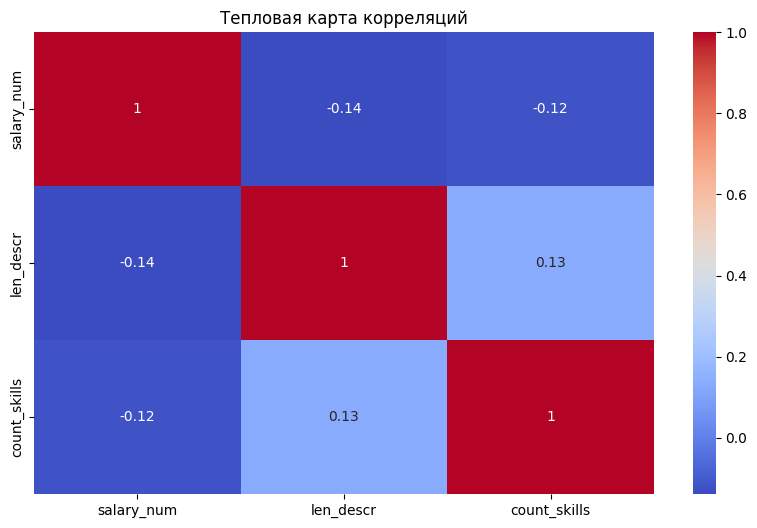

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляций')
plt.show()

18. Какие скиллы чаще всего требуются? Выведите топ-10 требуемых скиллов. **(3)**

In [24]:
all_skills = df['key_skills'].apply(lambda x: eval(x)).explode()
top_skills = all_skills.value_counts().head(10)
print(top_skills)

key_skills
Python                       57
SQL                          56
Big Data                     34
Математическая статистика    33
Data Analysis                27
Базы данных                  26
Математический анализ        26
NoSQL                        21
machine learning             17
Визуализация                 16
Name: count, dtype: int64


19. Постройте гистограмму распределения зарплаты среди вакансий в рублях.  **(3)**

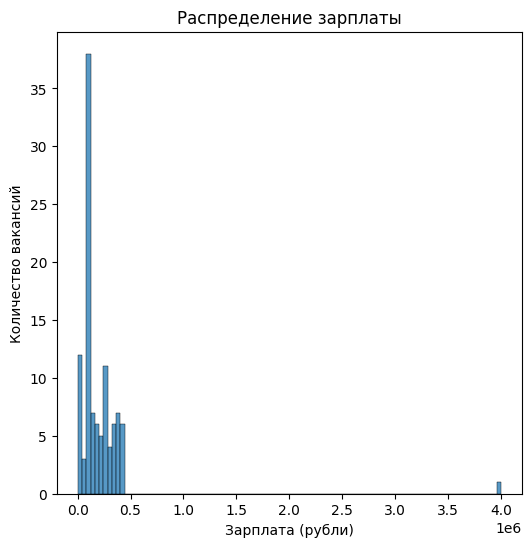

In [ ]:
plt.figure(figsize=(6, 6))
sns.histplot(df['salary_num'], bins=100)
plt.title('Распределение зарплаты')
plt.xlabel('Зарплата (рубли)')
plt.ylabel('Количество вакансий')
plt.show()



20. Постройте boxplot зарплаты (среди вакансий в рублях) с группировкой по полю experience **(3)**

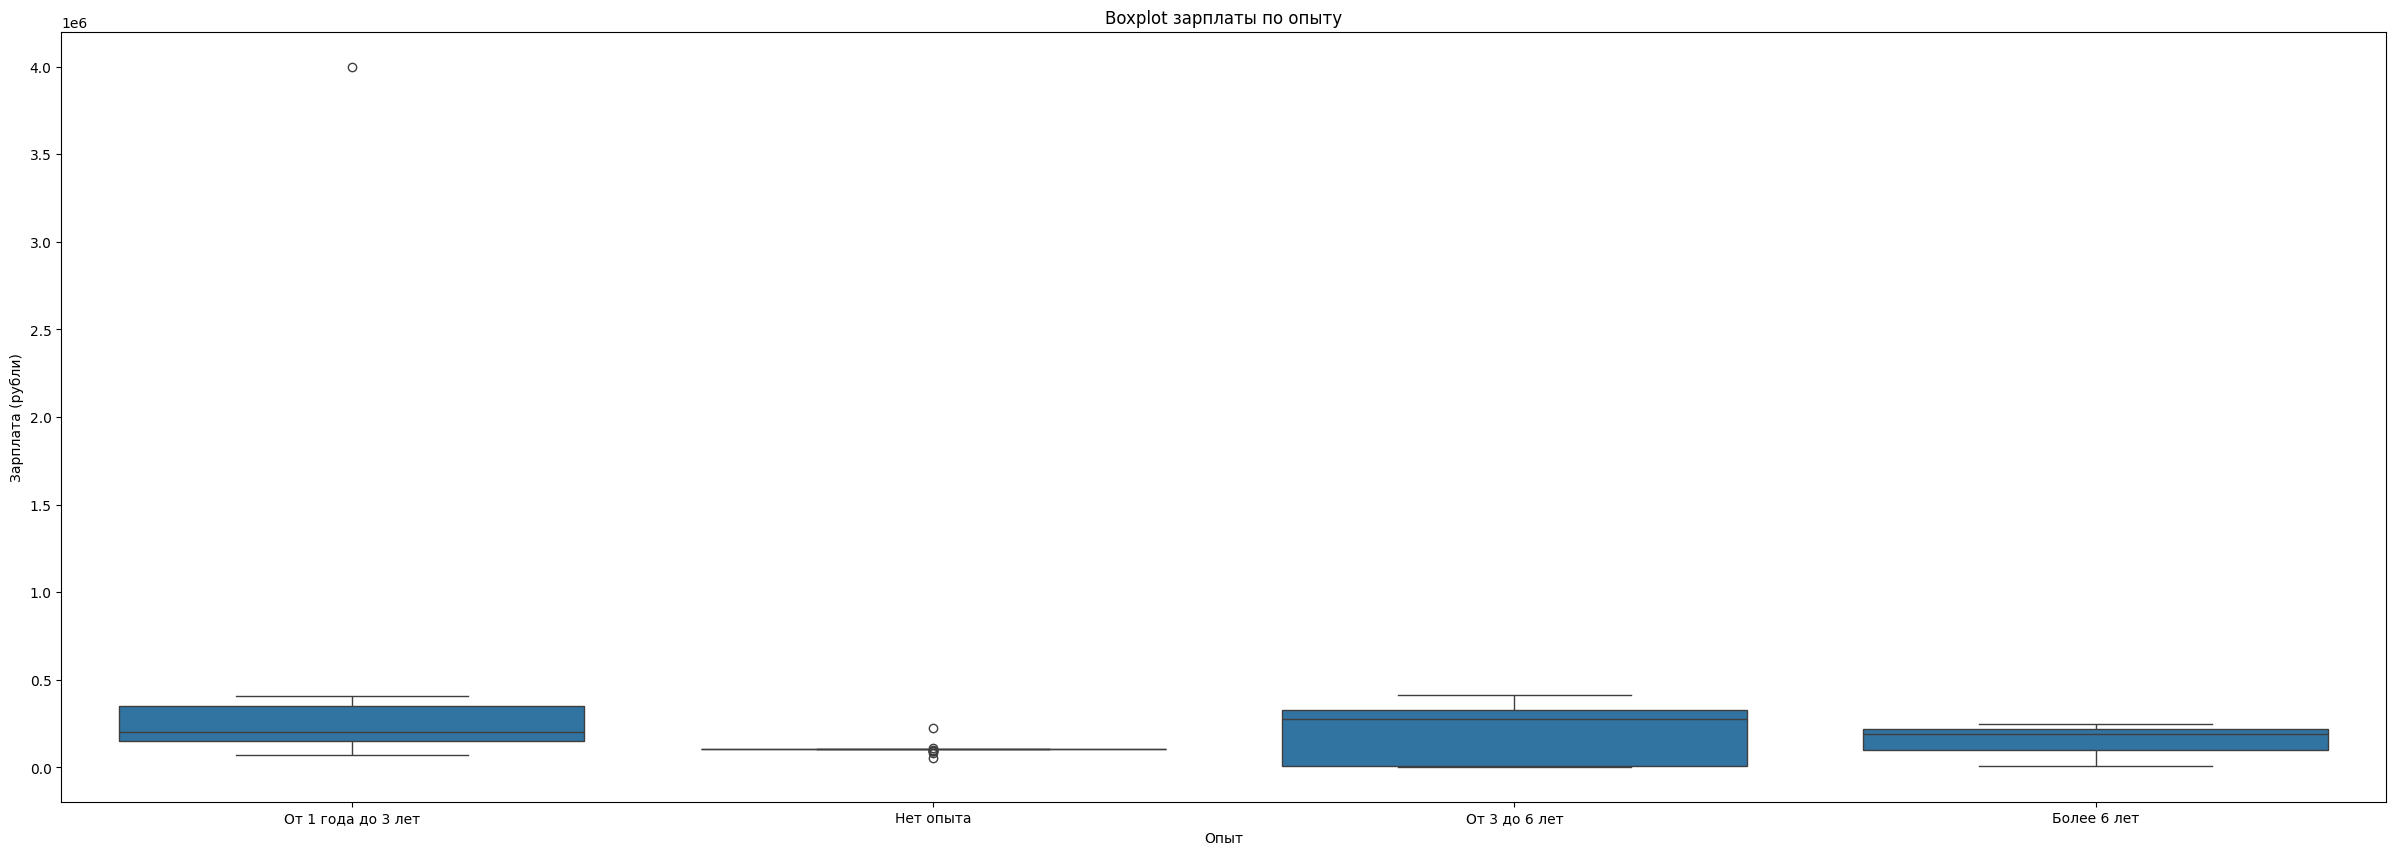

In [ ]:
plt.figure(figsize=(30, 10))
sns.boxplot(x='experience', y='salary_num', data=df)
plt.title('Boxplot зарплаты по опыту')
plt.xlabel('Опыт')
plt.ylabel('Зарплата (рубли)')
plt.show()

21. Попробуйте ответить на какой-нибудь вопрос по данным, не заданный ранее. Никак не ограничиваем вашу фантазию **(3)**

In [ ]:
schedule_analysis = df.groupby('schedule')['salary_num'].agg(['mean', 'median']).reset_index()
print(schedule_analysis)

           schedule           mean    median
0    Вахтовый метод            NaN       NaN
1     Гибкий график  161478.571429  150000.0
2       Полный день  225807.777778  235000.0
3    Сменный график            NaN       NaN
4  Удаленная работа  211806.481481  105000.0


## Задача 2. 55 баллов
Работаем с датасетом https://disk.yandex.ru/d/P6u1Za-nnmtwPA
Скачайте его.

Оцениваем факторы, которые влияют на цену на аренду в Москве.
Описание столбцов:

**metro** - ближайшая станция метро

**price** - цена за аренды


**minutes** - расстояние до метро в минутах

**way** - пусть до метро (пешком или на транспорте)

**views** - просмотры квартиры

**provider** - кто сдает квартиру (собственник, риелтор, застройщик)

**fee_percent** - процент, который получает риелтор

**storey**- этаж

**storeys**- число этажей в здании

**living_area** - жилая площаль

**kitchen_area** - площадь кухни

**total_area** - общая площадь


#### Часть 1. EDA. 30 баллов

In [25]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Beda3113/practice/refs/heads/main/rent.csv' , index_col=0)


1. Отобразите первые 5 и последние 5 строк. (**1**)

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/Beda3113/practice/refs/heads/main/rent.csv' , index_col=0)

print(df.head(5))
print(df.tail(5))

             metro  price   way  views                     provider  \
0      Planernaia   45000  walk    513  realtor                       
1           VDNKh   50000  walk    389  realtor                       
2   Alekseevskaia   50000  walk    483  realtor                       
3        Sviblovo   38000  walk    414  realtor                       
4        Rimskaia   55999  walk    360  realtor                       

   fee_percent  storey  minutes  storeys  living_area  kitchen_area  \
0           50       7       10       12           19             8   
1           50      16       10       16           18             8   
2           50       5        3       12           19             5   
3           50       3       15        5           37            37   
4           99       6        7       17           21            10   

   total_area  
0          38  
1          41  
2          33  
3          37  
4          40  
                             metro  price   way  v

2. Посчитайте описательные статистики числовых переменных с помощью describe() (**1**)

In [ ]:
df.describe()

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,43770.738589,417.917012,37.949516,7.089903,8.753804,22.545643,20.585754,11.369986,37.265560
std,33232.151532,936.532913,26.893347,16.511552,4.710759,347.279854,5.608993,8.083777,6.143386
min,14000.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,1.000000
25%,29000.000000,38.000000,0.000000,4.000000,5.000000,9.000000,18.000000,7.000000,34.000000
50%,38000.000000,103.000000,50.000000,6.000000,7.000000,12.000000,20.000000,10.000000,37.000000
75%,45000.000000,414.000000,50.000000,9.000000,12.000000,16.000000,21.000000,10.000000,40.000000
max,500000.000000,5174.000000,100.000000,613.000000,47.000000,13217.000000,37.000000,37.000000,57.000000


3. Посчитайте статистики по категориальным переменным. Сколько уникальных значений у переменной metro? (**1**)

In [ ]:
df['metro'].value_counts()
print(f"Уникальные значения в 'metro': {df['metro'].nunique()}")

Уникальные значения в 'metro': 119


4. Есть ли в датасете пропуски? (**1**)

In [ ]:
print(df.isnull().sum())

metro           0
price           0
way             0
views           0
provider        0
fee_percent     0
storey          0
minutes         0
storeys         0
living_area     0
kitchen_area    0
total_area      0
dtype: int64


5. Есть ли в датасете полные дубликаты? (**2**)

In [ ]:
print(f"Полные дубликаты: {df.duplicated().sum()}")

df_cleaned = df.drop_duplicates()

Полные дубликаты: 1201


6. Сколько уникальных значений у переменной provider? Есть ли со значениями этой переменной какие-нибудь проблемы? Если да, то как их исправить? (**3**)

> Ответ текстом

In [ ]:
unique_providers = df['provider'].unique()
print(unique_providers)
print(f"Уникальные значения в 'provider': {df['provider'].nunique()}")

df['provider'] = df['provider'].str.strip().str.lower()

['realtor' 'owner' 'agency' 'застройщик']
Уникальные значения в 'provider': 4


7. Постройте гистограммы распределения всех числовых переменных. Не забудьте подписать график и оси. (**2**)

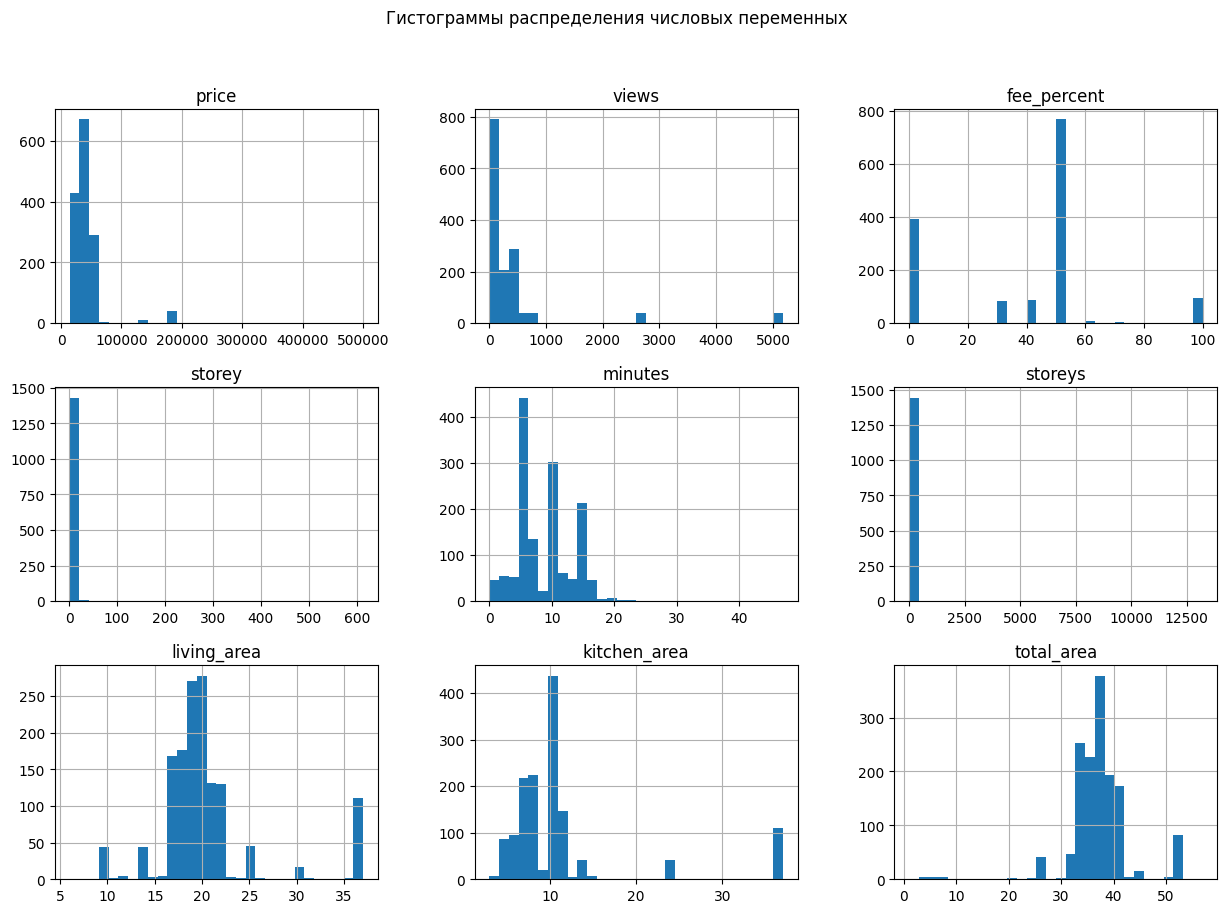

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Гистограммы распределения числовых переменных')
plt.show()

 8. Напишите функцию, которая принимает на вход датасет, названия столбцов, название графика и осей и рисует scatter plot. Нариcуйте с её помощью не менее трёх scatterplot. (**4**)

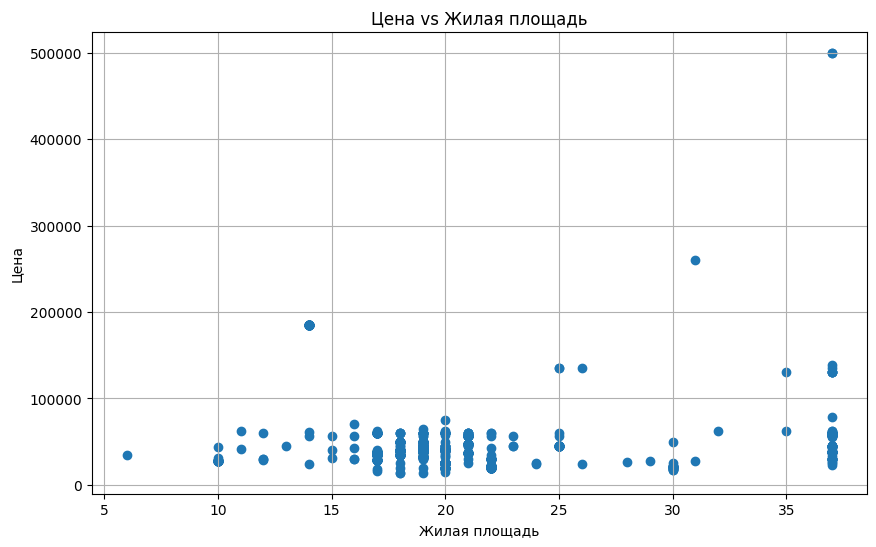

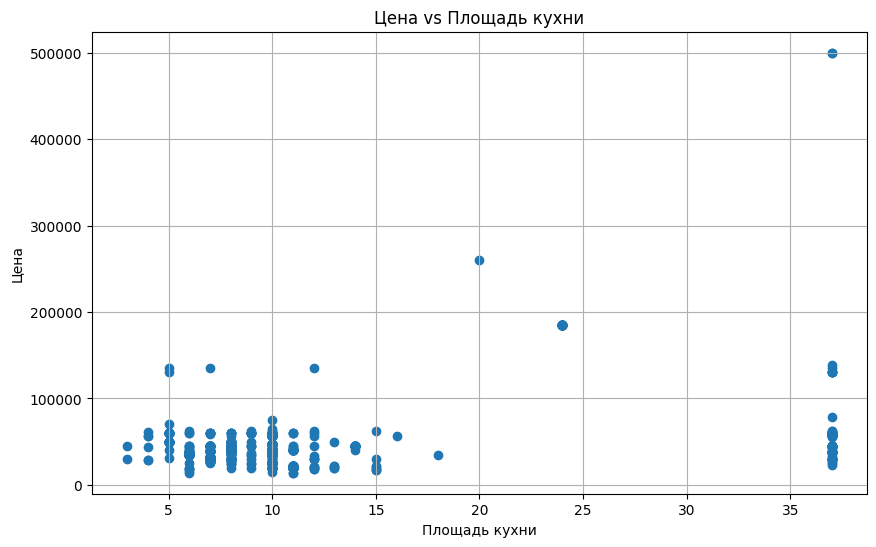

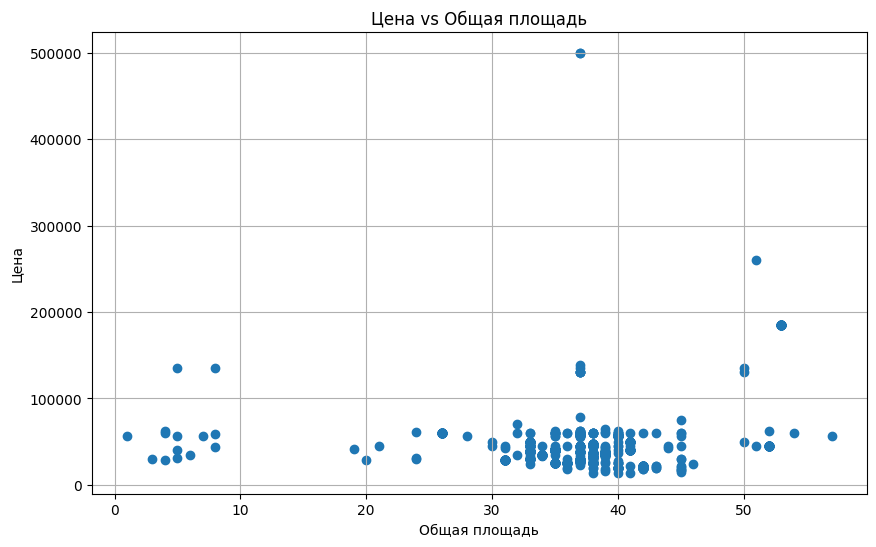

In [ ]:
   def scatter_plot(data, x_col, y_col, title, x_label, y_label):
       plt.figure(figsize=(10, 6))
       plt.scatter(data[x_col], data[y_col])
       plt.title(title)
       plt.xlabel(x_label)
       plt.ylabel(y_label)
       plt.grid()
       plt.show()

   scatter_plot(df, 'living_area', 'price', 'Цена vs Жилая площадь', 'Жилая площадь', 'Цена')
   scatter_plot(df, 'kitchen_area', 'price', 'Цена vs Площадь кухни', 'Площадь кухни', 'Цена')
   scatter_plot(df, 'total_area', 'price', 'Цена vs Общая площадь', 'Общая площадь', 'Цена')

9. Нарисуйте scatterplot всех пар переменных с помощью sns.pairplot. (**1**)

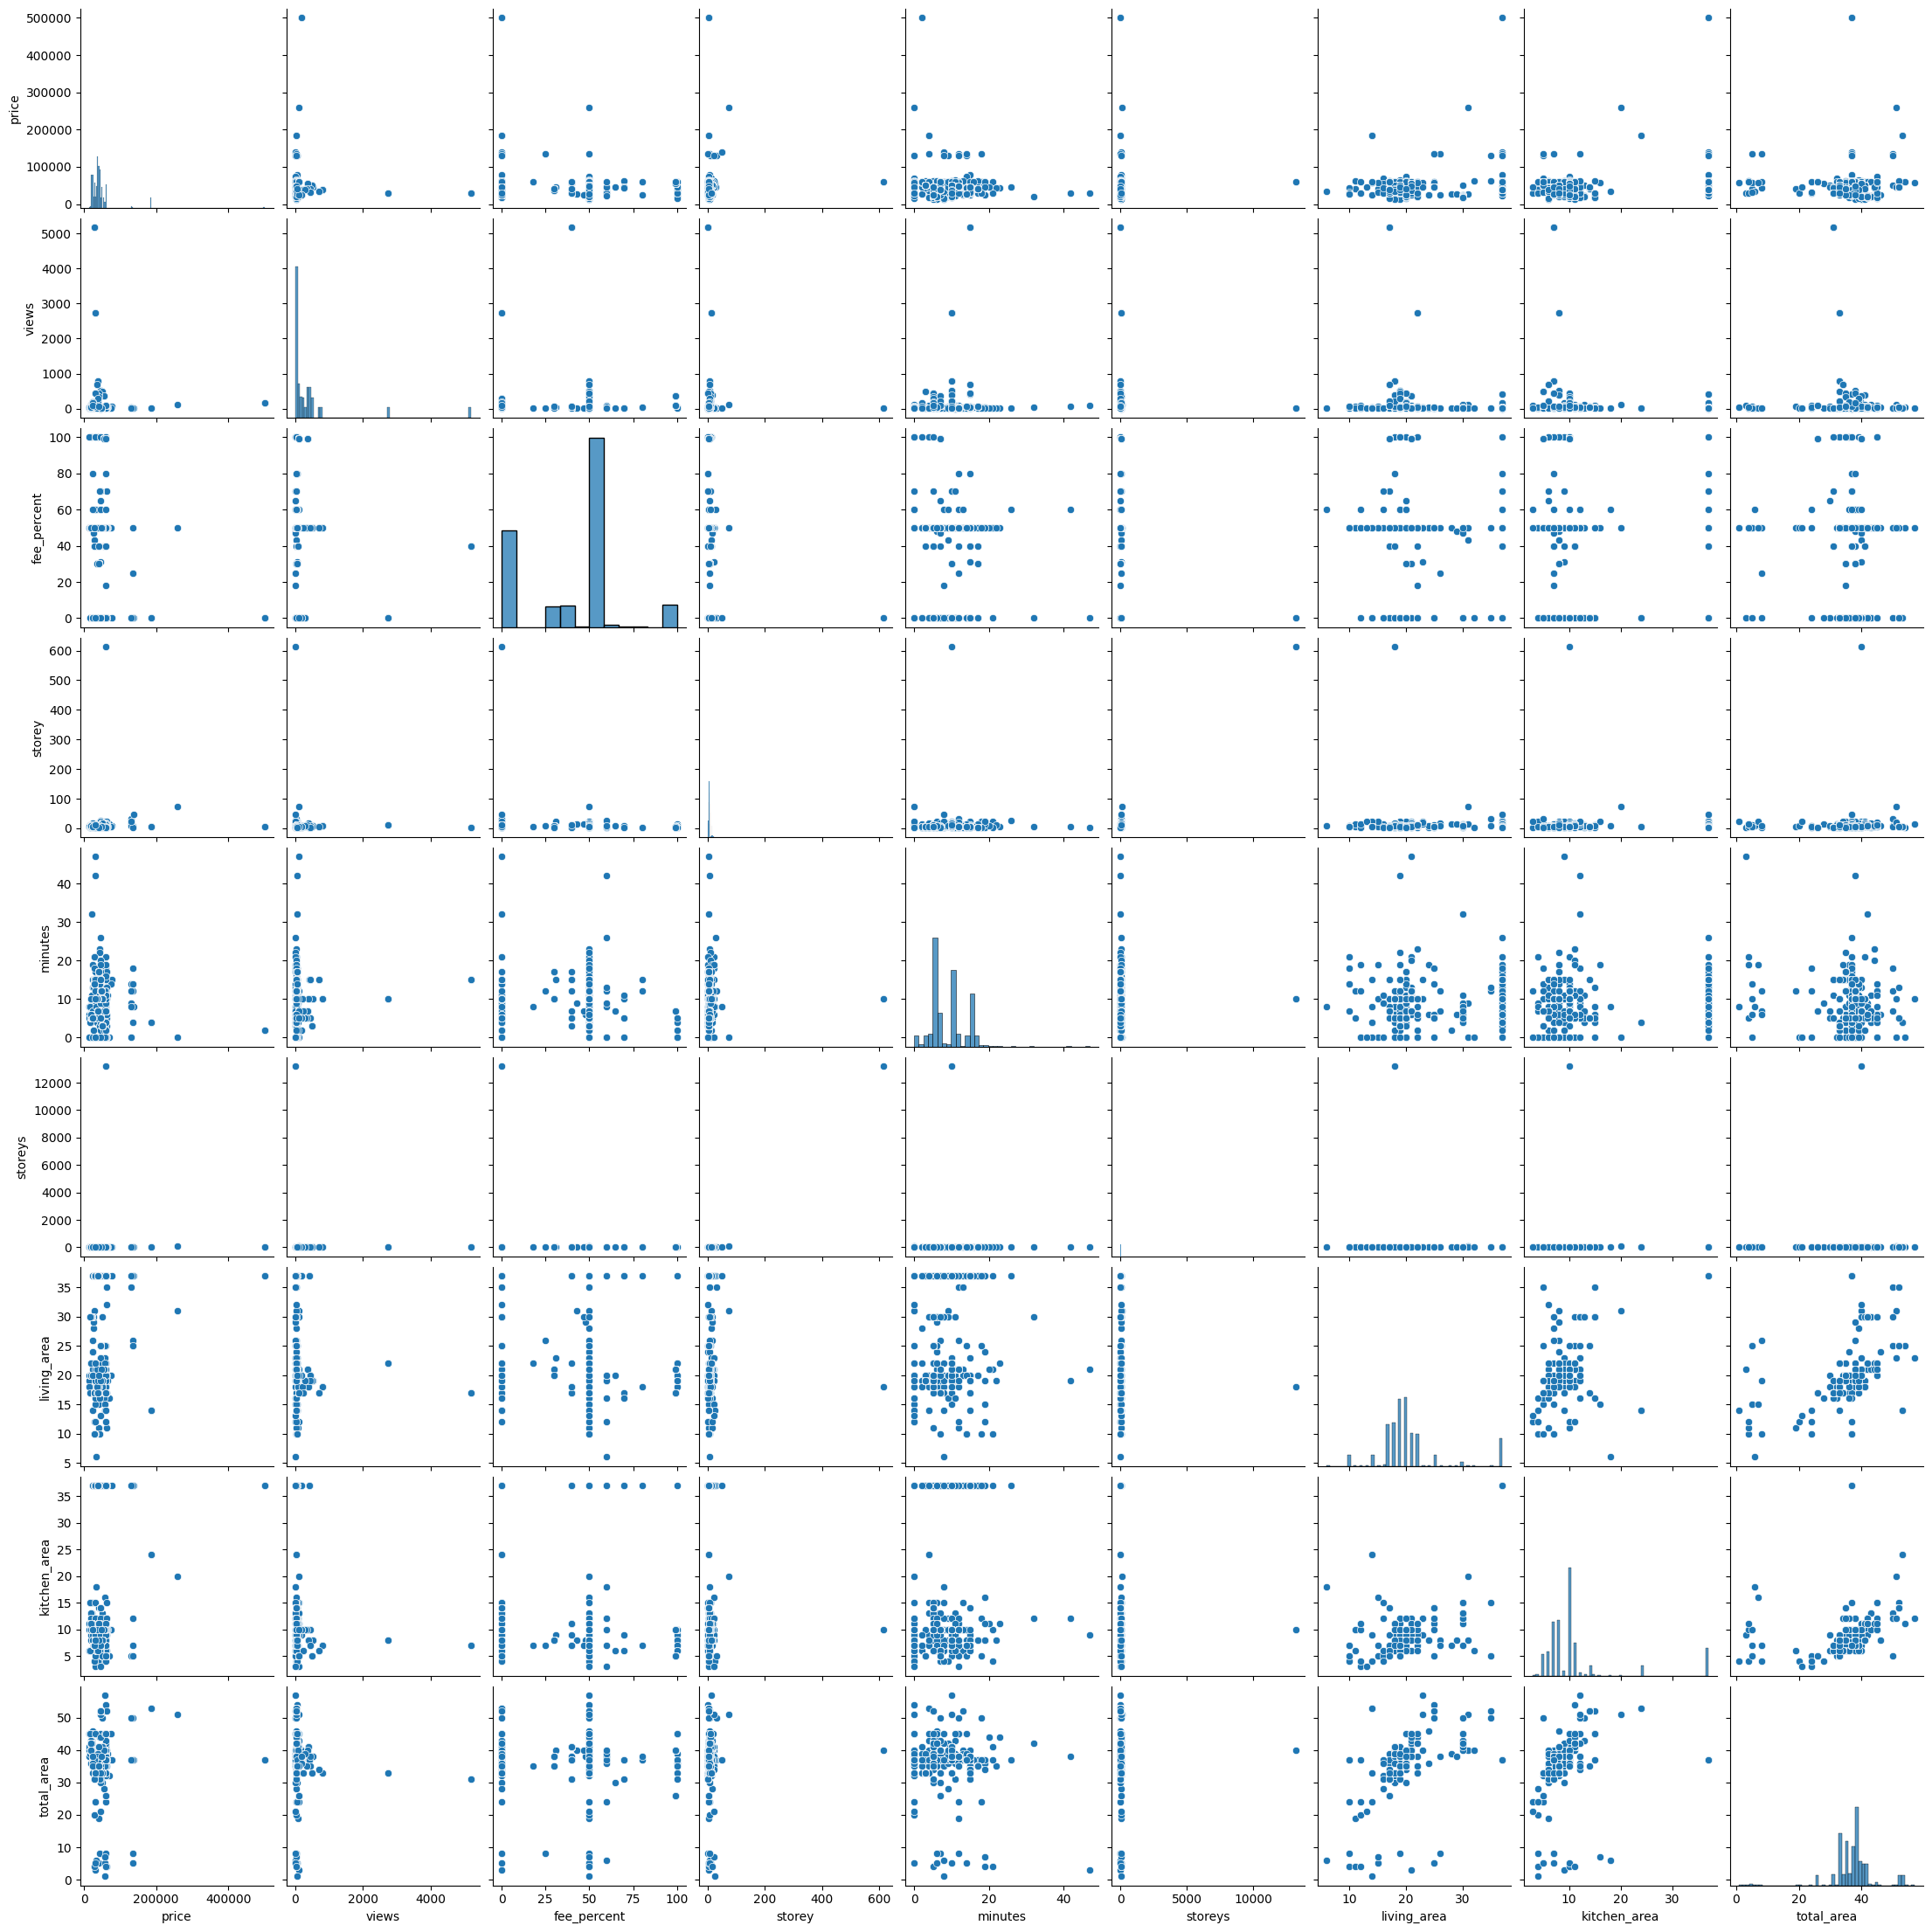

In [ ]:
import seaborn as sns

sns.pairplot(df)
plt.show()

10. Нарисуйте boxplot переменной price. (**2**)

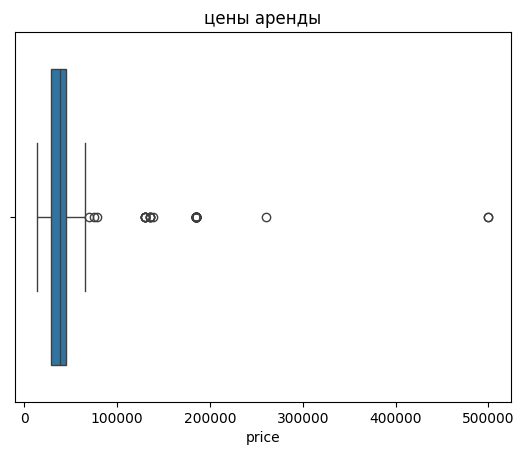

In [ ]:
sns.boxplot(x=df['price'])
plt.title('цены аренды')
plt.show()

11. Нарисуйте еще какой-нибудь график, который считайте нужным. (**2**)

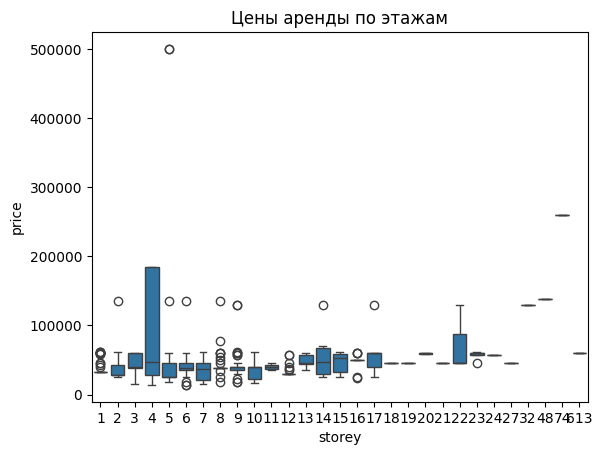

In [ ]:
sns.boxplot(x='storey', y='price', data=df)
plt.title('Цены аренды по этажам')
plt.show()

12. Какие выводы можно сделать из визуализаций 7-12? (**2**)

Можно отметить, какие факторы влияют на цену.
> Ответ текстом

13. Постройте таблицу корреляций и тепловую карту числовых переменных. Между какими переменными наблюдается линейная связь? (**3**)

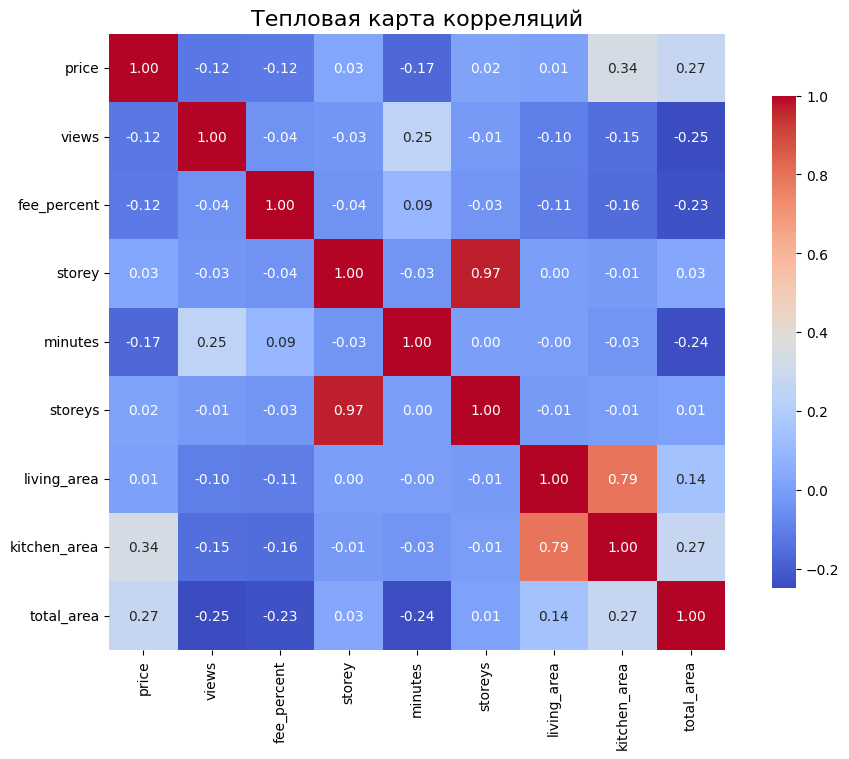

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df_numeric = df.select_dtypes(include=[np.number])

df_numeric = df_numeric.dropna()

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Тепловая карта корреляций', fontsize=16)
plt.show()

> Ответ текстом

#### Часть 2. Построение модели. 30 баллов

1. Раздйлите датасет на обучающую и тестовую выборку. Постройте линейную регрессию для переменной price, используя только числовые переменные. Перед этим стандартизируйте все независимые переменные с помощью StandardScaler. (**5**)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE,  root_mean_squared_error as RMSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.select_dtypes(include=['float64', 'int64'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2. Сделайте прогноз, посчитайте MSE и RMSE модели на тестовой выборке (**5**)

In [ ]:

import numpy as np


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"MSE: {mse}, RMSE: {rmse}")

MSE: 3.638721648881976e-19, RMSE: 6.0321817353939e-10


3. Закодируйте переменные way	и	provider с помощью OneHotEncoding и добавьте их в модель. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

NameError: name 'ColumnTransformer' is not defined

4. Удалите из обучающей выборке выбросы по цене (тестовую выборку не трогайте!) Выбросами считайте цены, которые дороже, чем $Q3+1.5 * IQR$, где $IQR$ - межквартильный размах, $Q3$ - 75 перцентиль. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

5. Попробуйте написать свою реализацию функций MSE и RMSE. Функции должна принимать на вход numpy-массив истинных значений и предсказаний и возвращать результат. Примените функции к предсказаниям последней модели. Сравните результат с библиотечной реализацией. (**6**)

Напоминаем, что

${MSE}=\frac{1}{n} \sum_{i=1}^n \left(y_i-\hat{y_i}\right)^2$, где $y_i$ - истинное значение на i-ом наблюдении, $\hat{y_i}$  - предсказание модели на i-ом наблюдении.

Также рекомендуем ознакомиться с документацией: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [ ]:
def MSE(y_true, y_pred):
    # ваш код

    return mse

In [ ]:
def RMSE(y_true, y_pred):
    # ваш код

    return rmse

6. Попробуйте улучшить модель, добавив еще какое-нибудь преобразование (например, можете оставить только часть столбцов, добавить новые признаки, закодировать переменную metro и т.п.). Посчитайте метрики. Удалось ли улучшить модель? (**4**)

*Примечание. Любой разумный технически верно проведенный эксперимент
 засчитывается, даже если метрику улучшить не удалось.*